<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/miniproject2/MarcBonastre_mini_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mini-proyecto 2: 

Aplicar un análisis de reducción de dimensionalidad con PCA y una selección de atributos relevantes utilzando la técnica Recursive Feature Elimination (RFE):

Se pueden utilizar las BBDD siguientes u otras que encontréis en Kaggle o UCI datasets:

Hotels bookings: Datos sobre reservas en hoteles, con datos de duración de la reserva, cancelaciones, etc. https://www.kaggle.com/jessemostipak/hotel-booking-demand

Iris flowers dataset: Medidas de pétalos y sépalos de flores para clasificarlas según diferentes tipos de especies botánicas https://www.kaggle.com/uciml/iris

Wine properties and quality: Datos sobre características químicas de vinos y un indicador de calidad: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

Netflix movies: Datos sobre películas de netflix con fecha 2019, incluye datos del casting y valoración de los usuarios https://www.kaggle.com/shivamb/netflix-shows

US COVID-19 dataset: Datos sobre contaje de casos en condados de Estados Unidos: https://www.kaggle.com/fireballbyedimyrnmom/us-counties-covid-19-dataset

US crash accidents: Datos sonbre accidentes de tráfico en Estados Unidos https://www.kaggle.com/sobhanmoosavi/us-accidents

Suicide Rates: Datos sobre suicidios https://www.kaggle.com/kralmachine/data-visualization-of-suicide-rates

Barcelona data: Estadísticas sobre población, economía, negocios, etc. https://www.kaggle.com/xvivancos/barcelona-data-sets

#Base de datos seleccionada:
https://www.kaggle.com/calvingee/nba-stat-projections-2019/data#


#PCA

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
import pandas as pd
import seaborn as sns; 

nba = pd.read_csv('/content/gdrive/My Drive/data_course/FantasyPros_Fantasy_Basketball_Overall_2019_Projections.csv',header=0)
nba.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Player Team Positions     PTS  ...    3PM    GP     MIN     TO
0           James Harden  HOU     PG,SG  2458.0  ...  299.0  79.0  2825.0  368.0
1          Stephen Curry  GSW     PG,SG  2222.0  ...  402.0  77.0  2607.0  238.0
2  Giannis Antetokounmpo  MIL     SF,PF  2176.0  ...   61.0  76.0  2664.0  246.0
3         Damian Lillard  POR        PG  2147.0  ...  248.0  80.0  2920.0  213.0
4          Anthony Davis  LAL      PF,C  2117.0  ...   67.0  74.0  2694.0  164.0

[5 rows x 14 columns]

In [73]:
nba.shape

(287, 14)

In [74]:
nba.dtypes

Player        object
Team          object
Positions     object
PTS          float64
REB          float64
AST          float64
BLK          float64
STL          float64
FG%          float64
FT%          float64
3PM          float64
GP           float64
MIN          float64
TO           float64
dtype: object

In [75]:
nba.describe()

PTS          REB  ...          MIN          TO
count   287.000000   287.000000  ...   287.000000  287.000000
mean    906.874564   364.372822  ...  1843.320557  109.432056
std     435.879039   189.025076  ...   546.321643   56.926048
min     141.000000    96.000000  ...   431.000000   21.000000
25%     589.500000   228.000000  ...  1456.500000   67.500000
50%     819.000000   321.000000  ...  1892.000000   99.000000
75%    1162.500000   441.000000  ...  2280.000000  134.000000
max    2458.000000  1237.000000  ...  2920.000000  368.000000

[8 rows x 11 columns]

In [0]:
nba_nan = nba.dropna()

In [77]:
nba_nan.shape

(287, 14)

In [0]:
nba_num = nba.select_dtypes(include='number')

In [79]:
nba_num.shape

(287, 11)

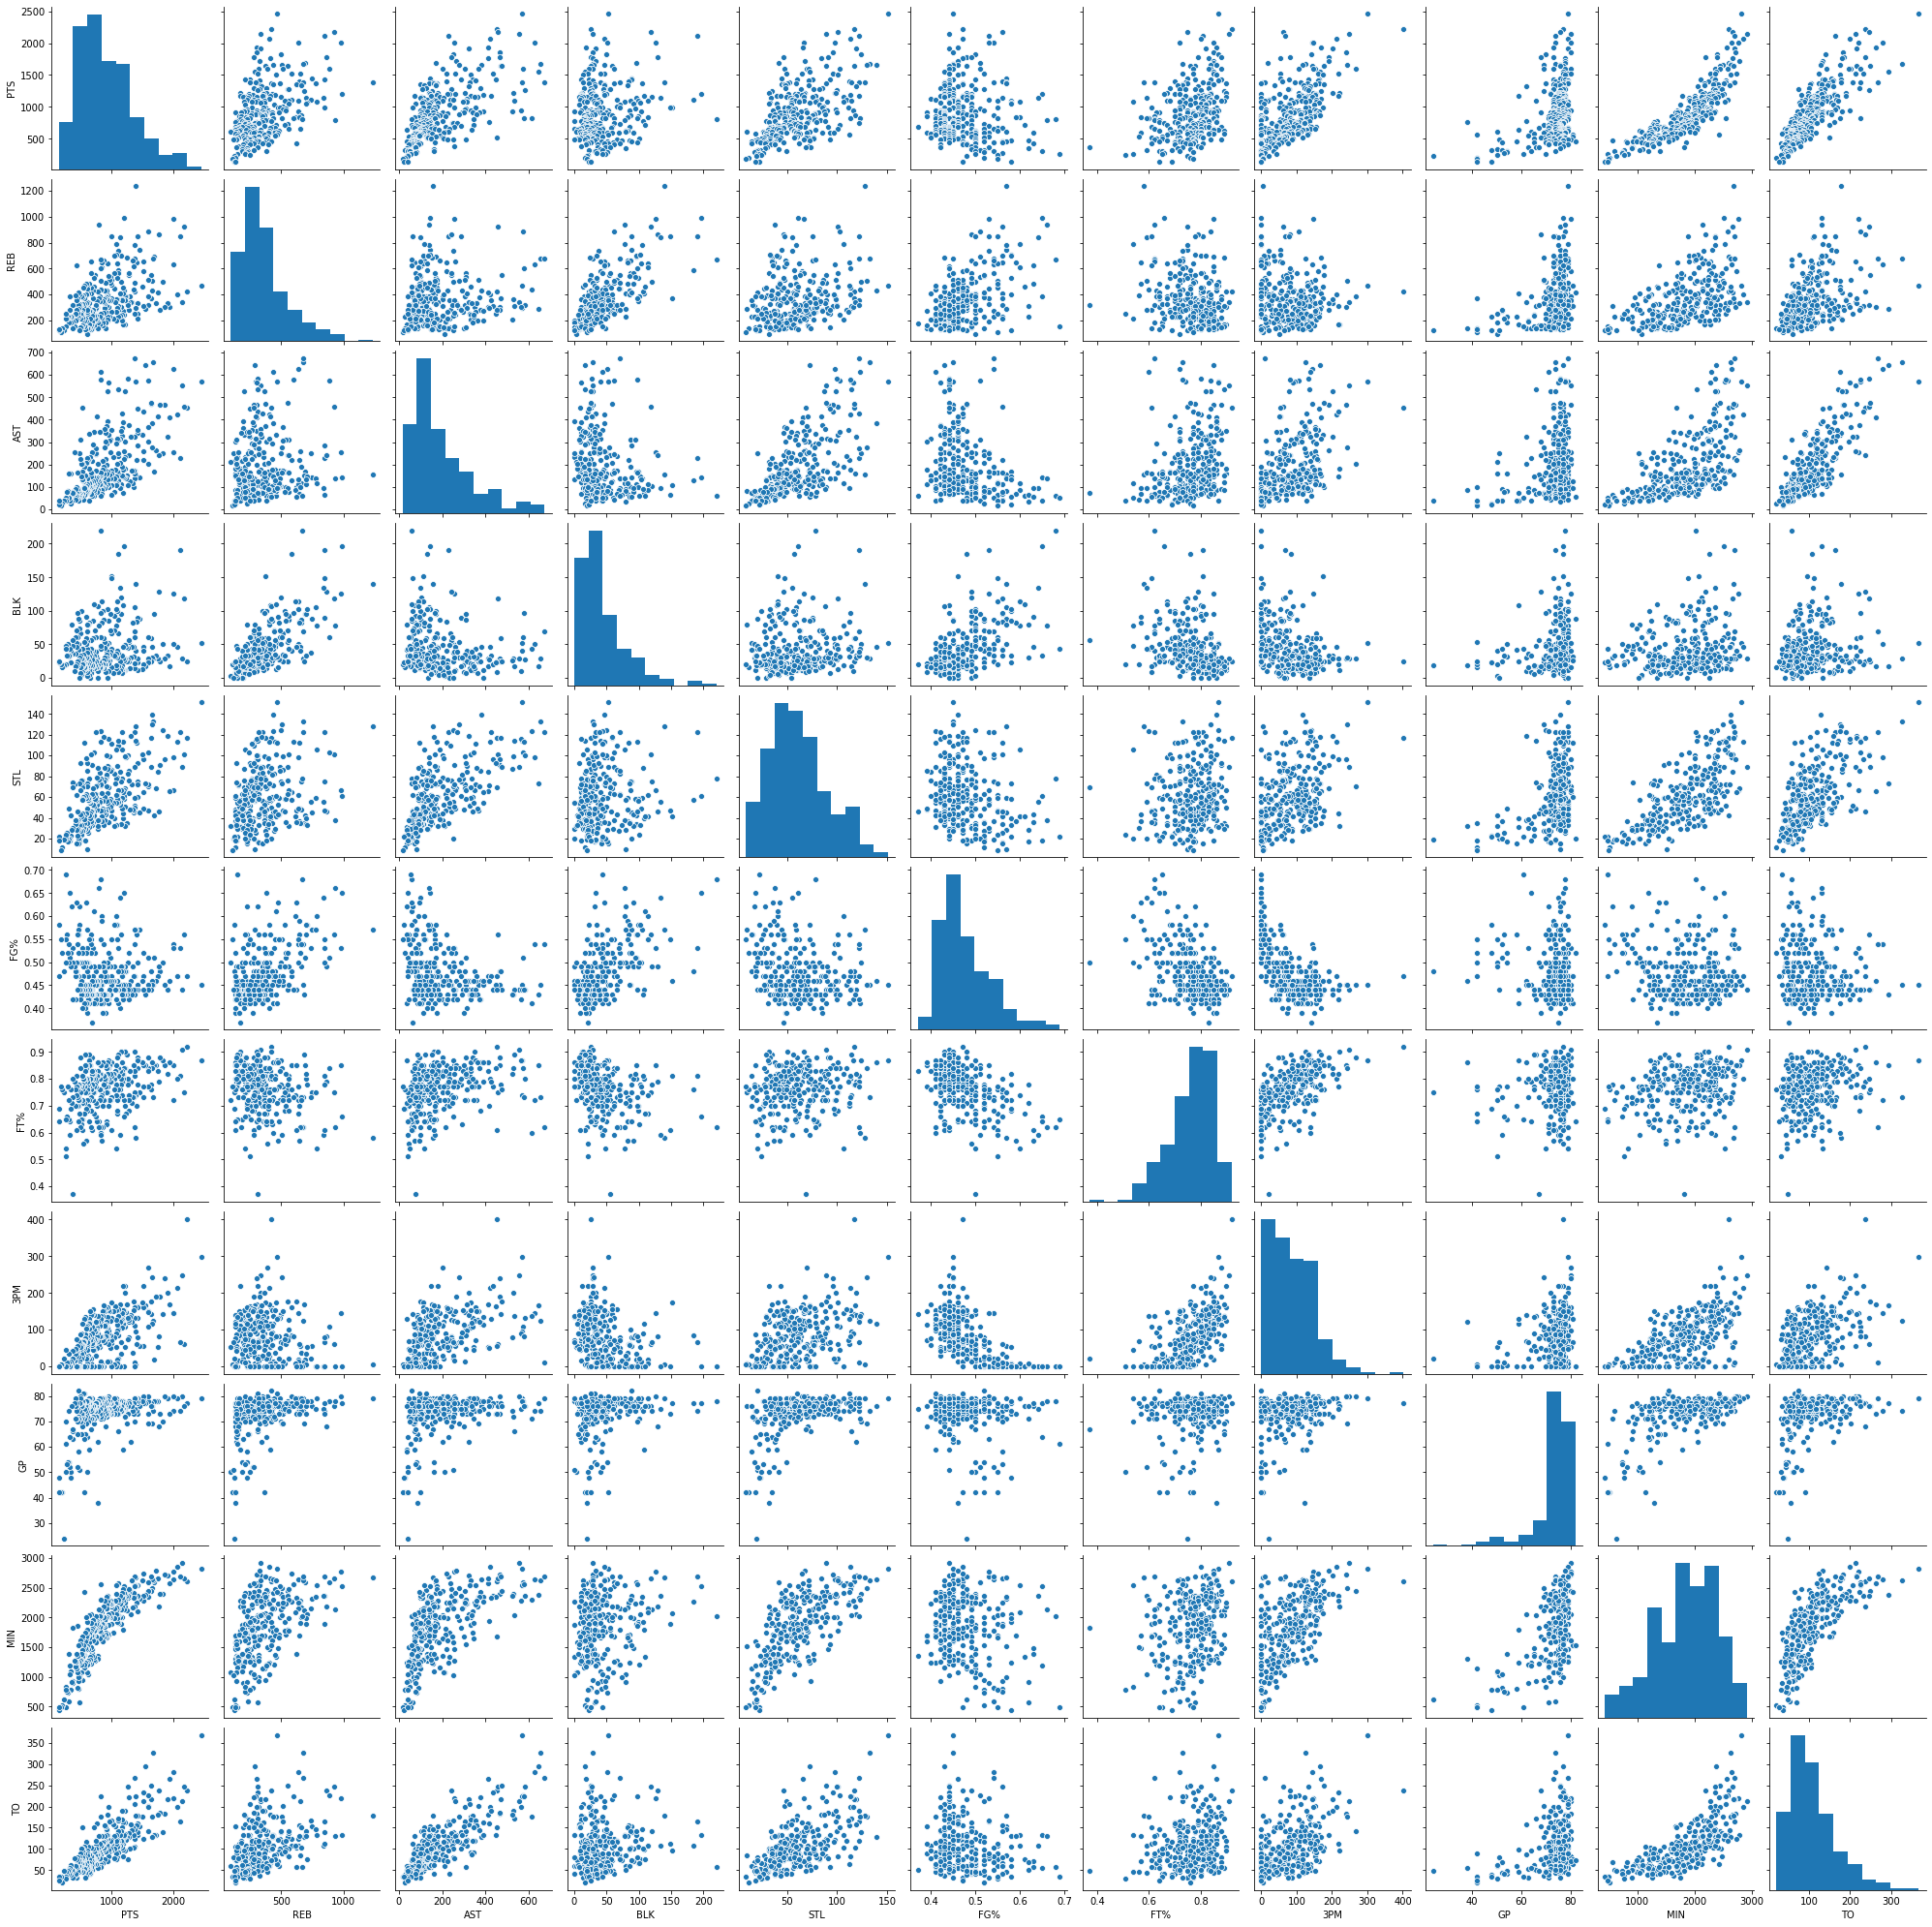

In [29]:
nba_nan.shape
nbapairplot = sns.pairplot(nba_nan)

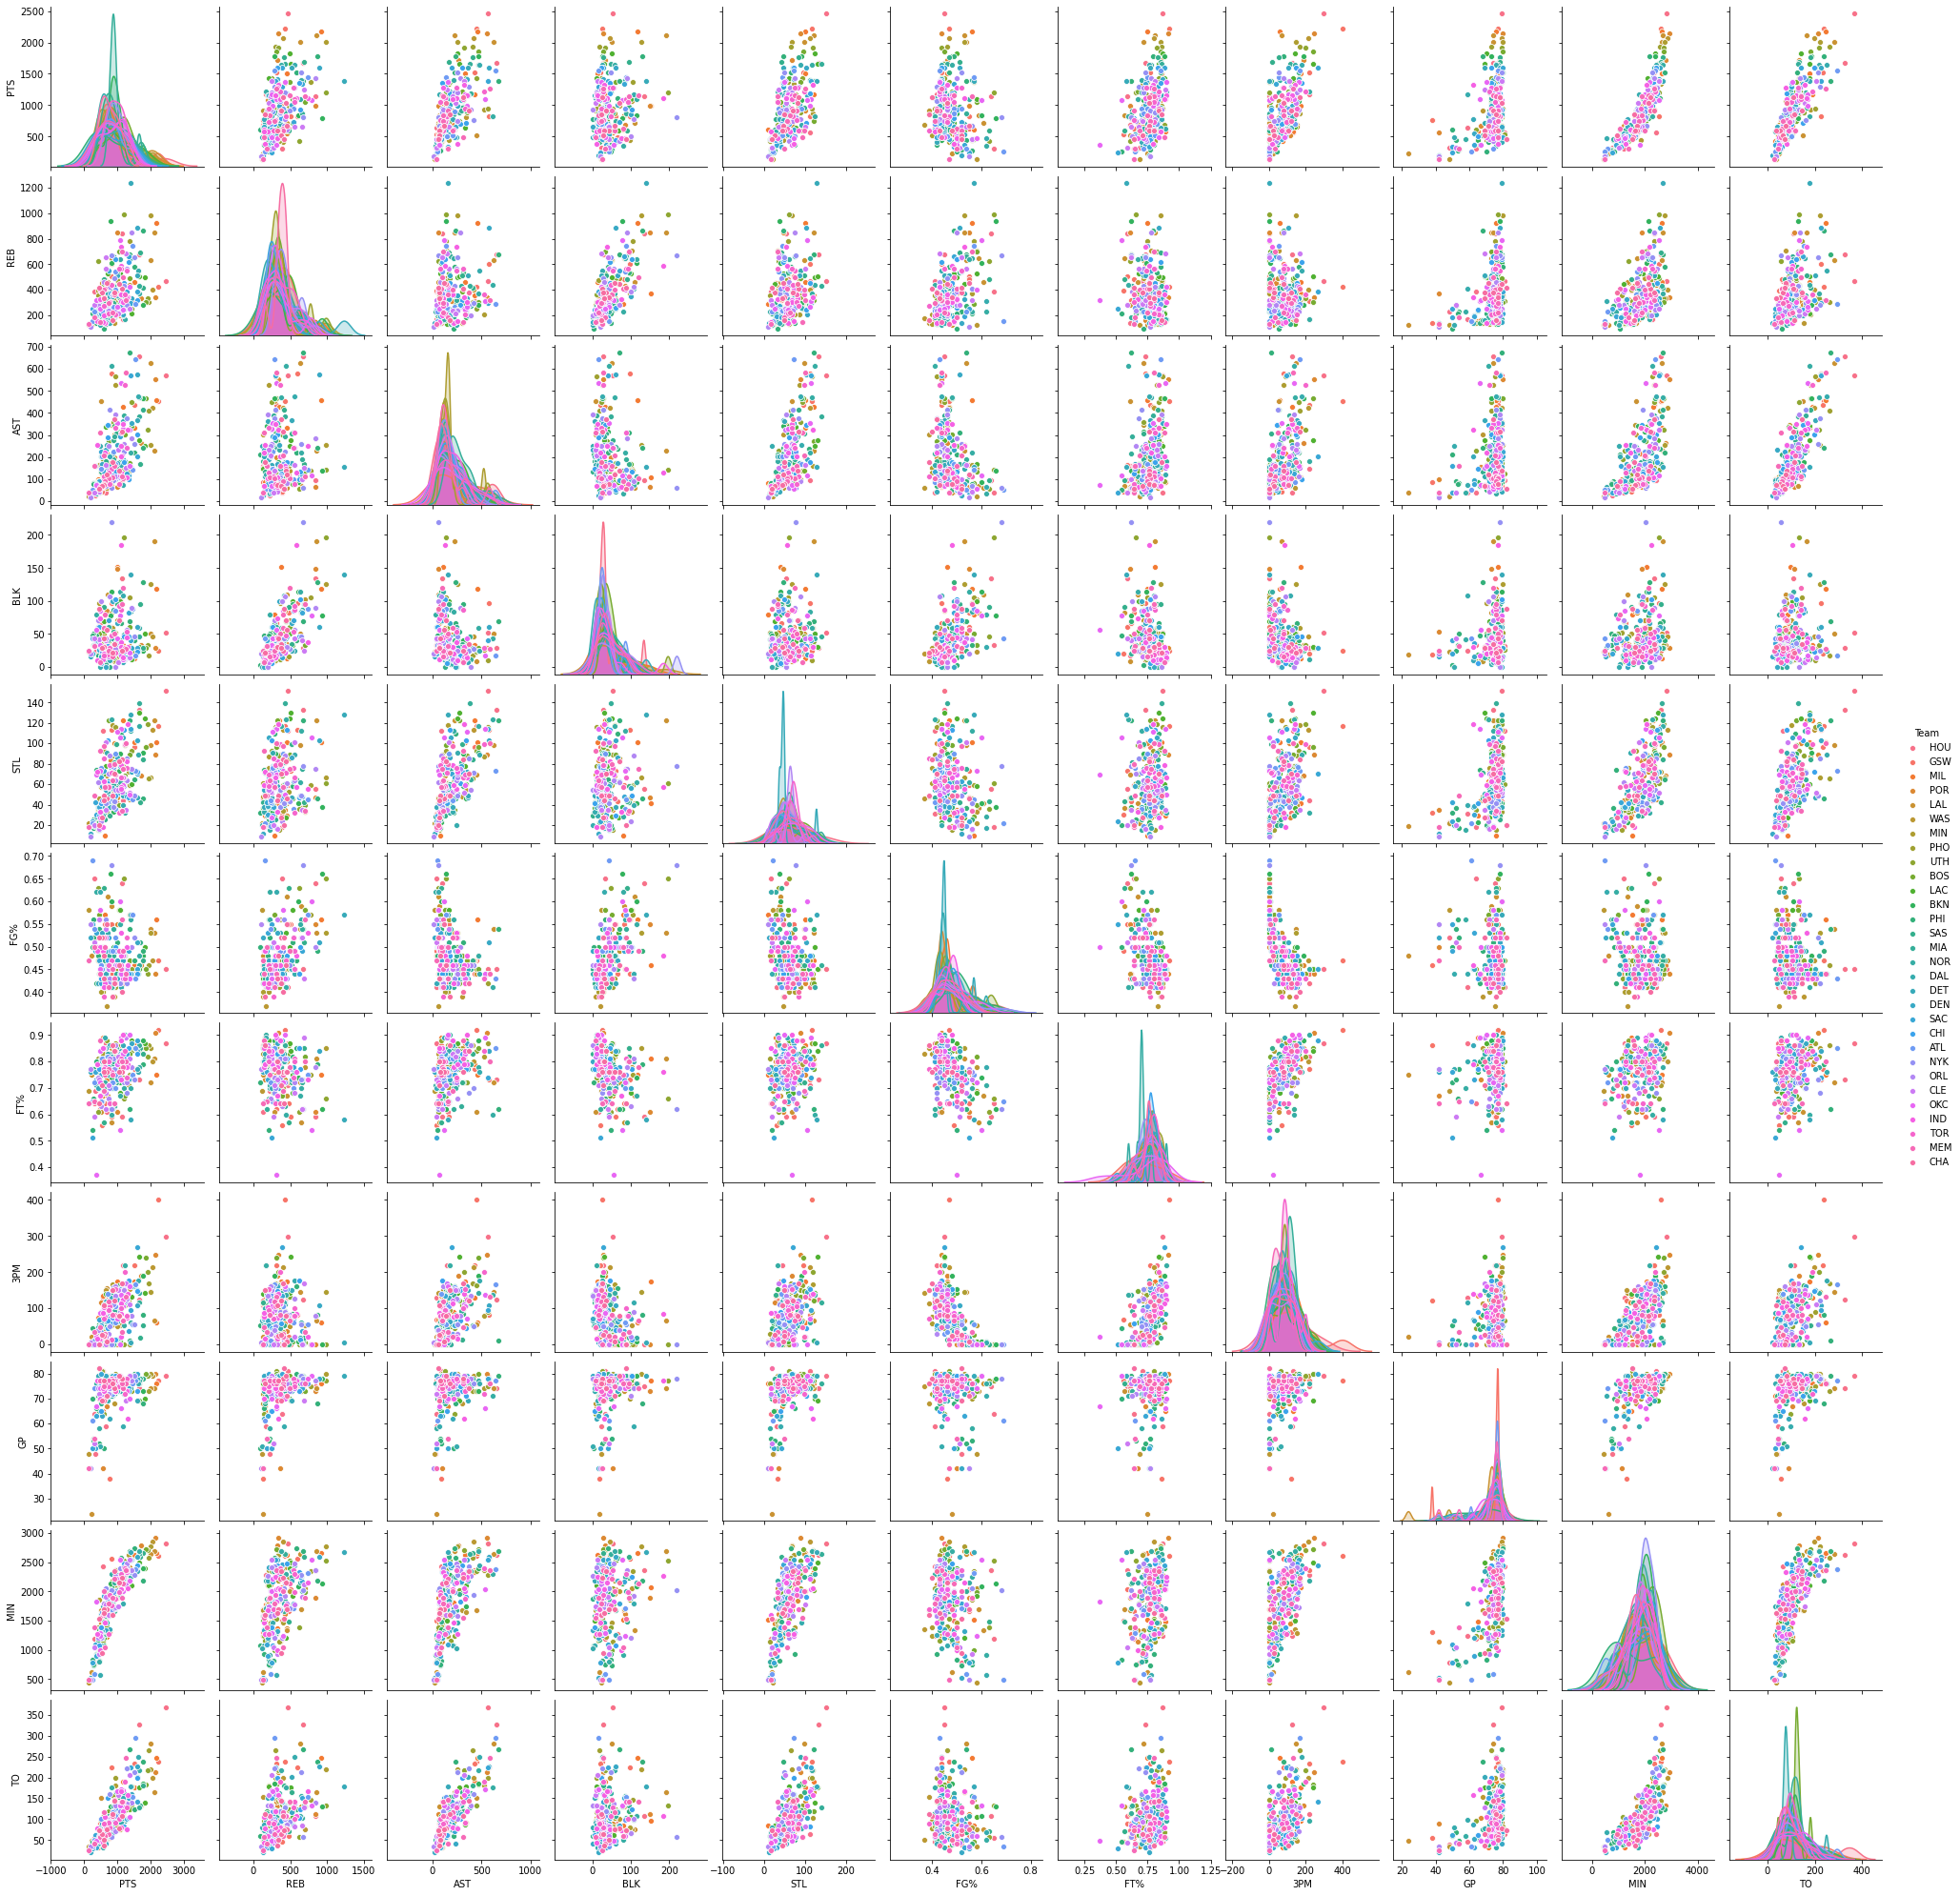

In [30]:
nba_nan.shape
nbapairplot = sns.pairplot(nba_nan, hue="Team")

In [80]:
nba_nan.columns

Index(['Player', 'Team', 'Positions', 'PTS', 'REB', 'AST', 'BLK', 'STL', 'FG%',
       'FT%', '3PM', 'GP', 'MIN', 'TO'],
      dtype='object')

In [81]:
nba_nan['Positions'].unique()

array(['PG,SG', 'SF,PF', 'PG', 'PF,C', 'SG', 'C', 'SG,SF', 'SF,PF ',
       'PG,SG,PF', 'PF ', 'PG,SF', 'PF', 'PG,SG ', 'SF,SG', 'SG,SF ',
       'SF', 'PF,SF', 'C,PF', 'PF,PG,SF', 'PF,C ', 'SG,SF,PF', 'C '],
      dtype=object)

In [0]:
x = nba_num[['PTS', 'REB', 'AST', 'BLK', 'STL', 'FG%', 'FT%', '3PM', 'GP', 'MIN',
       'TO']]
y = nba_nan['Positions']

##**Variance ratio 1**

datos originales = (287, 14)
datos sin NaNs = (287, 14)
datos numericos sin NaNs = (287, 11)
varianza explicada acumulada =[ 44.02919748  69.34049642  77.83100999  84.794154    88.91949835
  92.40032029  95.10995274  97.28505522  98.44749215  99.49058478
 100.        ]
Dimensionalidad datos en espacio PCA reducido = (287, 6)


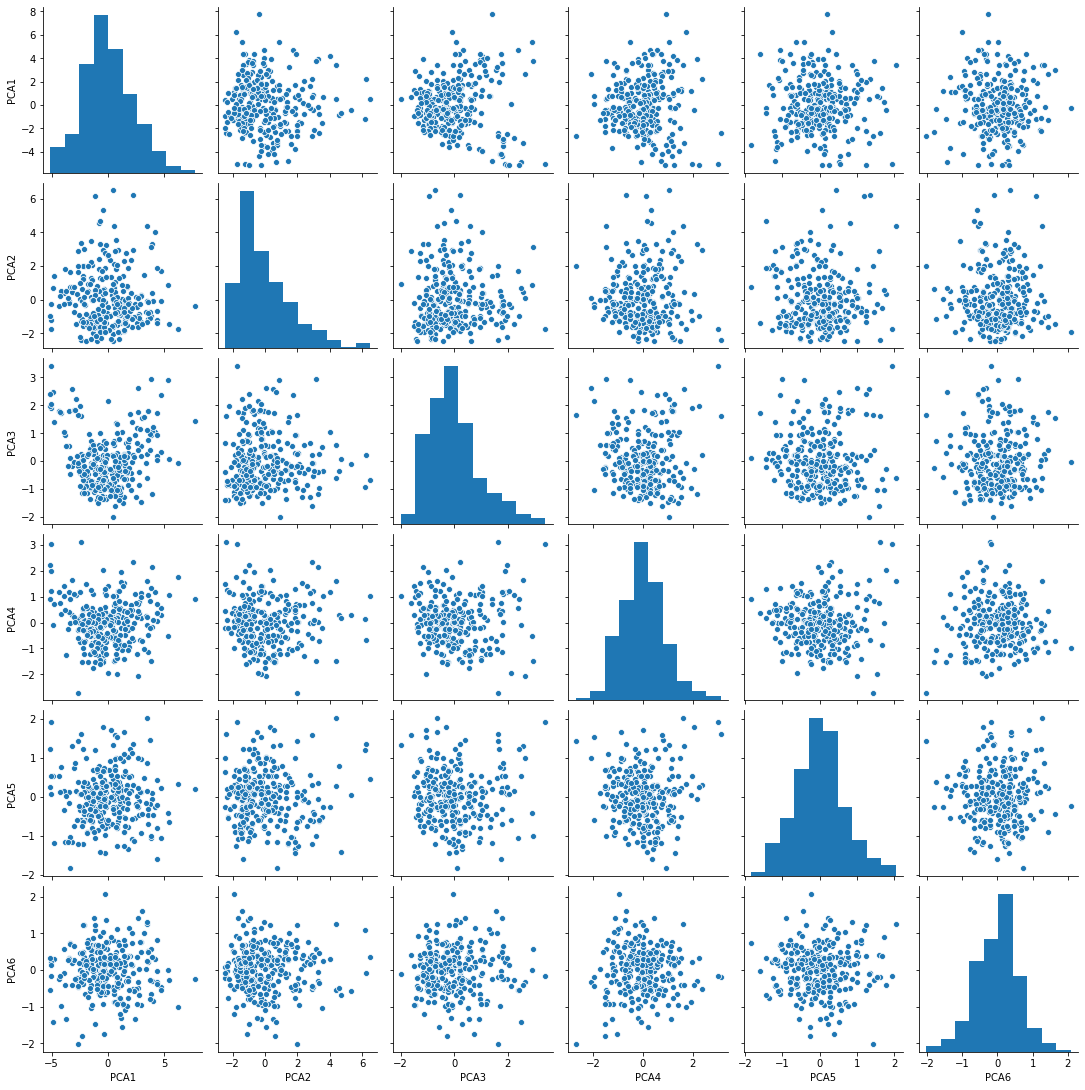

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

print('datos originales = {}'.format(nba.shape))
print('datos sin NaNs = {}'.format(nba_nan.shape))
print('datos numericos sin NaNs = {}'.format(nba_num.shape))

XS = StandardScaler().fit_transform(x)

pca = decomposition.PCA(n_components=11).fit(XS)
 
# varianza explicada acumulada:
print('varianza explicada acumulada ={}'.format(100*pca.explained_variance_ratio_.cumsum()))

Xproj = pca.transform(XS)
XPCA = Xproj[:,0:6]

print('Dimensionalidad datos en espacio PCA reducido = {}'.format(XPCA.shape))

d = pd.DataFrame(XPCA,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6'])
sns.pairplot(d)
plt.show()

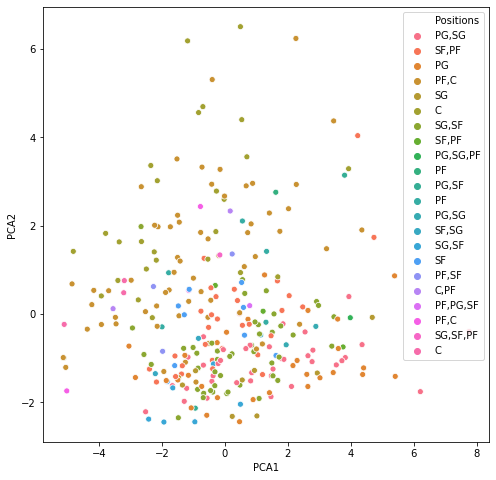

In [84]:
dfpca = pd.DataFrame(XPCA[:,0:2],columns=['PCA1', 'PCA2'])

fig = plt.figure(figsize=(8,8))

ax = sns.scatterplot(x="PCA1", y="PCA2", hue=y,data=dfpca)
plt.show()

##Agrupando las distintas opciones de posiciones de jugador
En el caso que un jugador tenga varias posiciones, he dejado solamente la primera y sustituido por un valor

In [0]:
nba_nan_positions = nba_nan
nba_nan_positions['Positions'] = nba_nan_positions.Positions.replace(['PG,SG', 'SF,PF', 'PG', 'PF,C', 'SG', 'C', 'SG,SF', 'SF,PF ',
       'PG,SG,PF', 'PF ', 'PG,SF', 'PF', 'PG,SG ', 'SF,SG', 'SG,SF ', 'SF', 'PF,SF', 'C,PF', 'PF,PG,SF', 'PF,C ', 'SG,SF,PF', 'C '],
       [1, 3, 1, 4, 2, 5, 2, 3, 1, 4, 1, 4, 1, 3, 2, 3, 4, 5, 4, 4, 2, 5])

In [86]:
nba_nan_positions['Positions'].unique()

array([1, 3, 4, 2, 5])

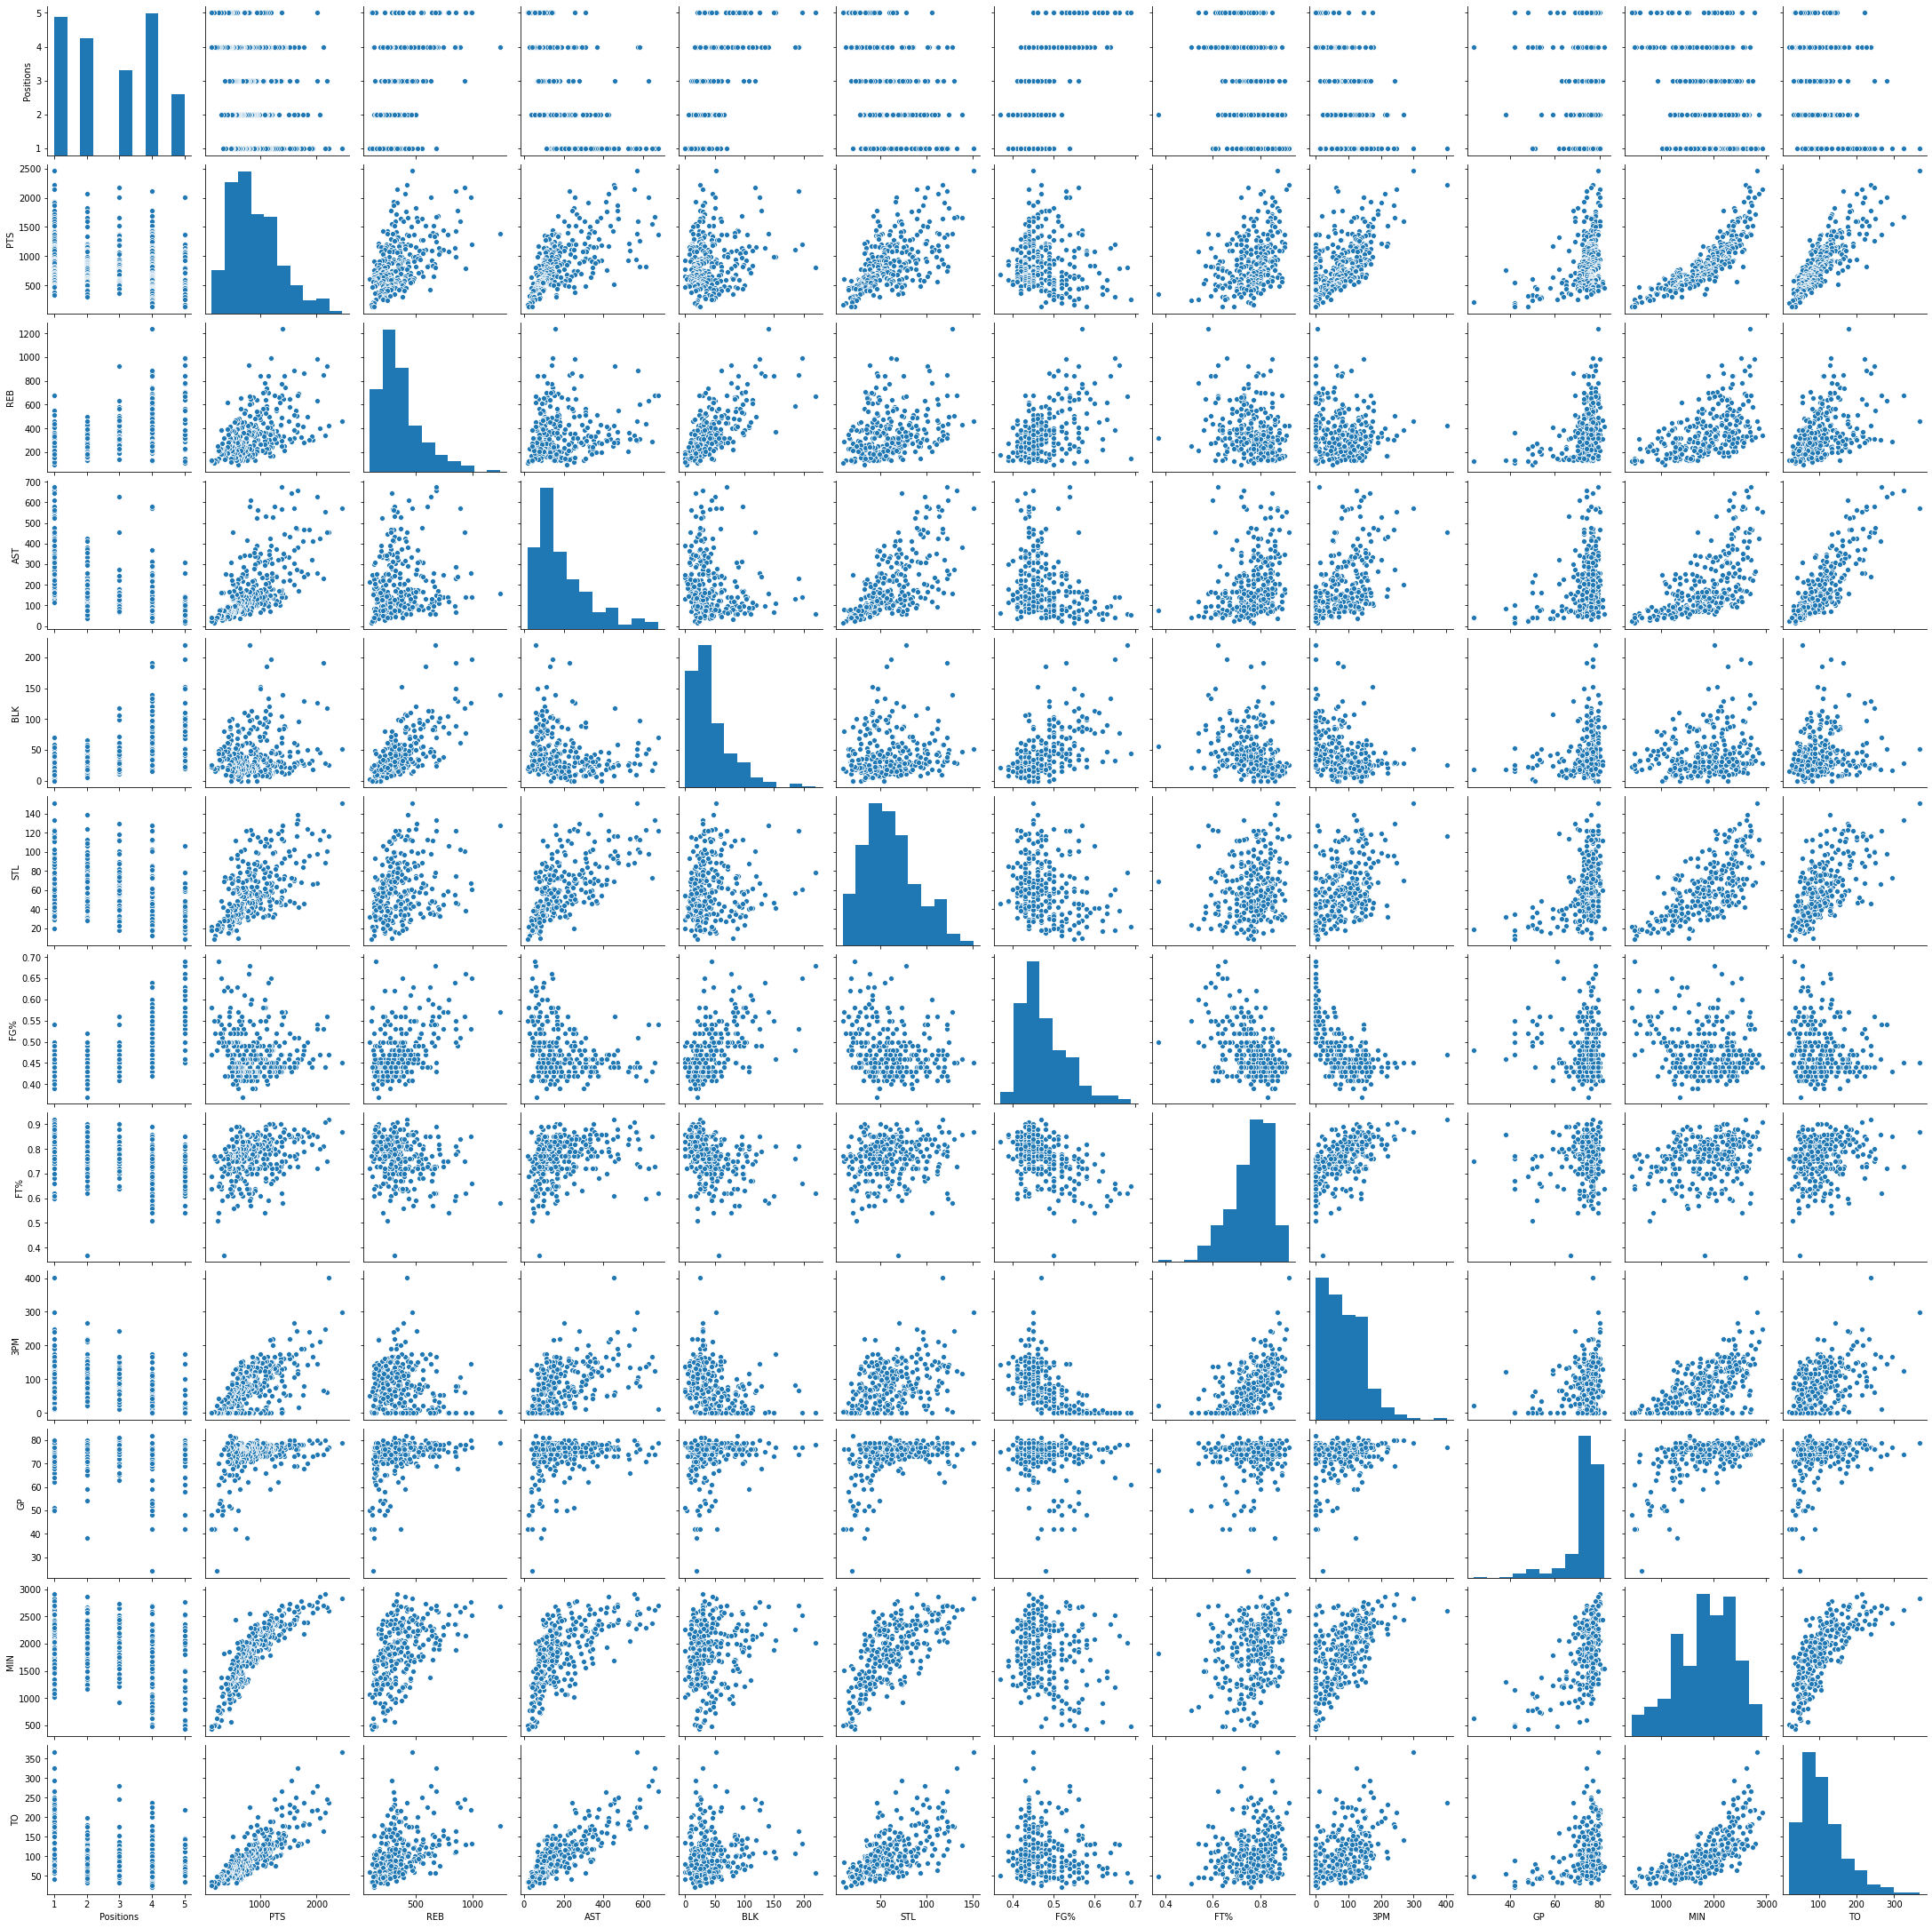

In [16]:
nba_nan_positions.shape
nbapairplot = sns.pairplot(nba_nan_positions)

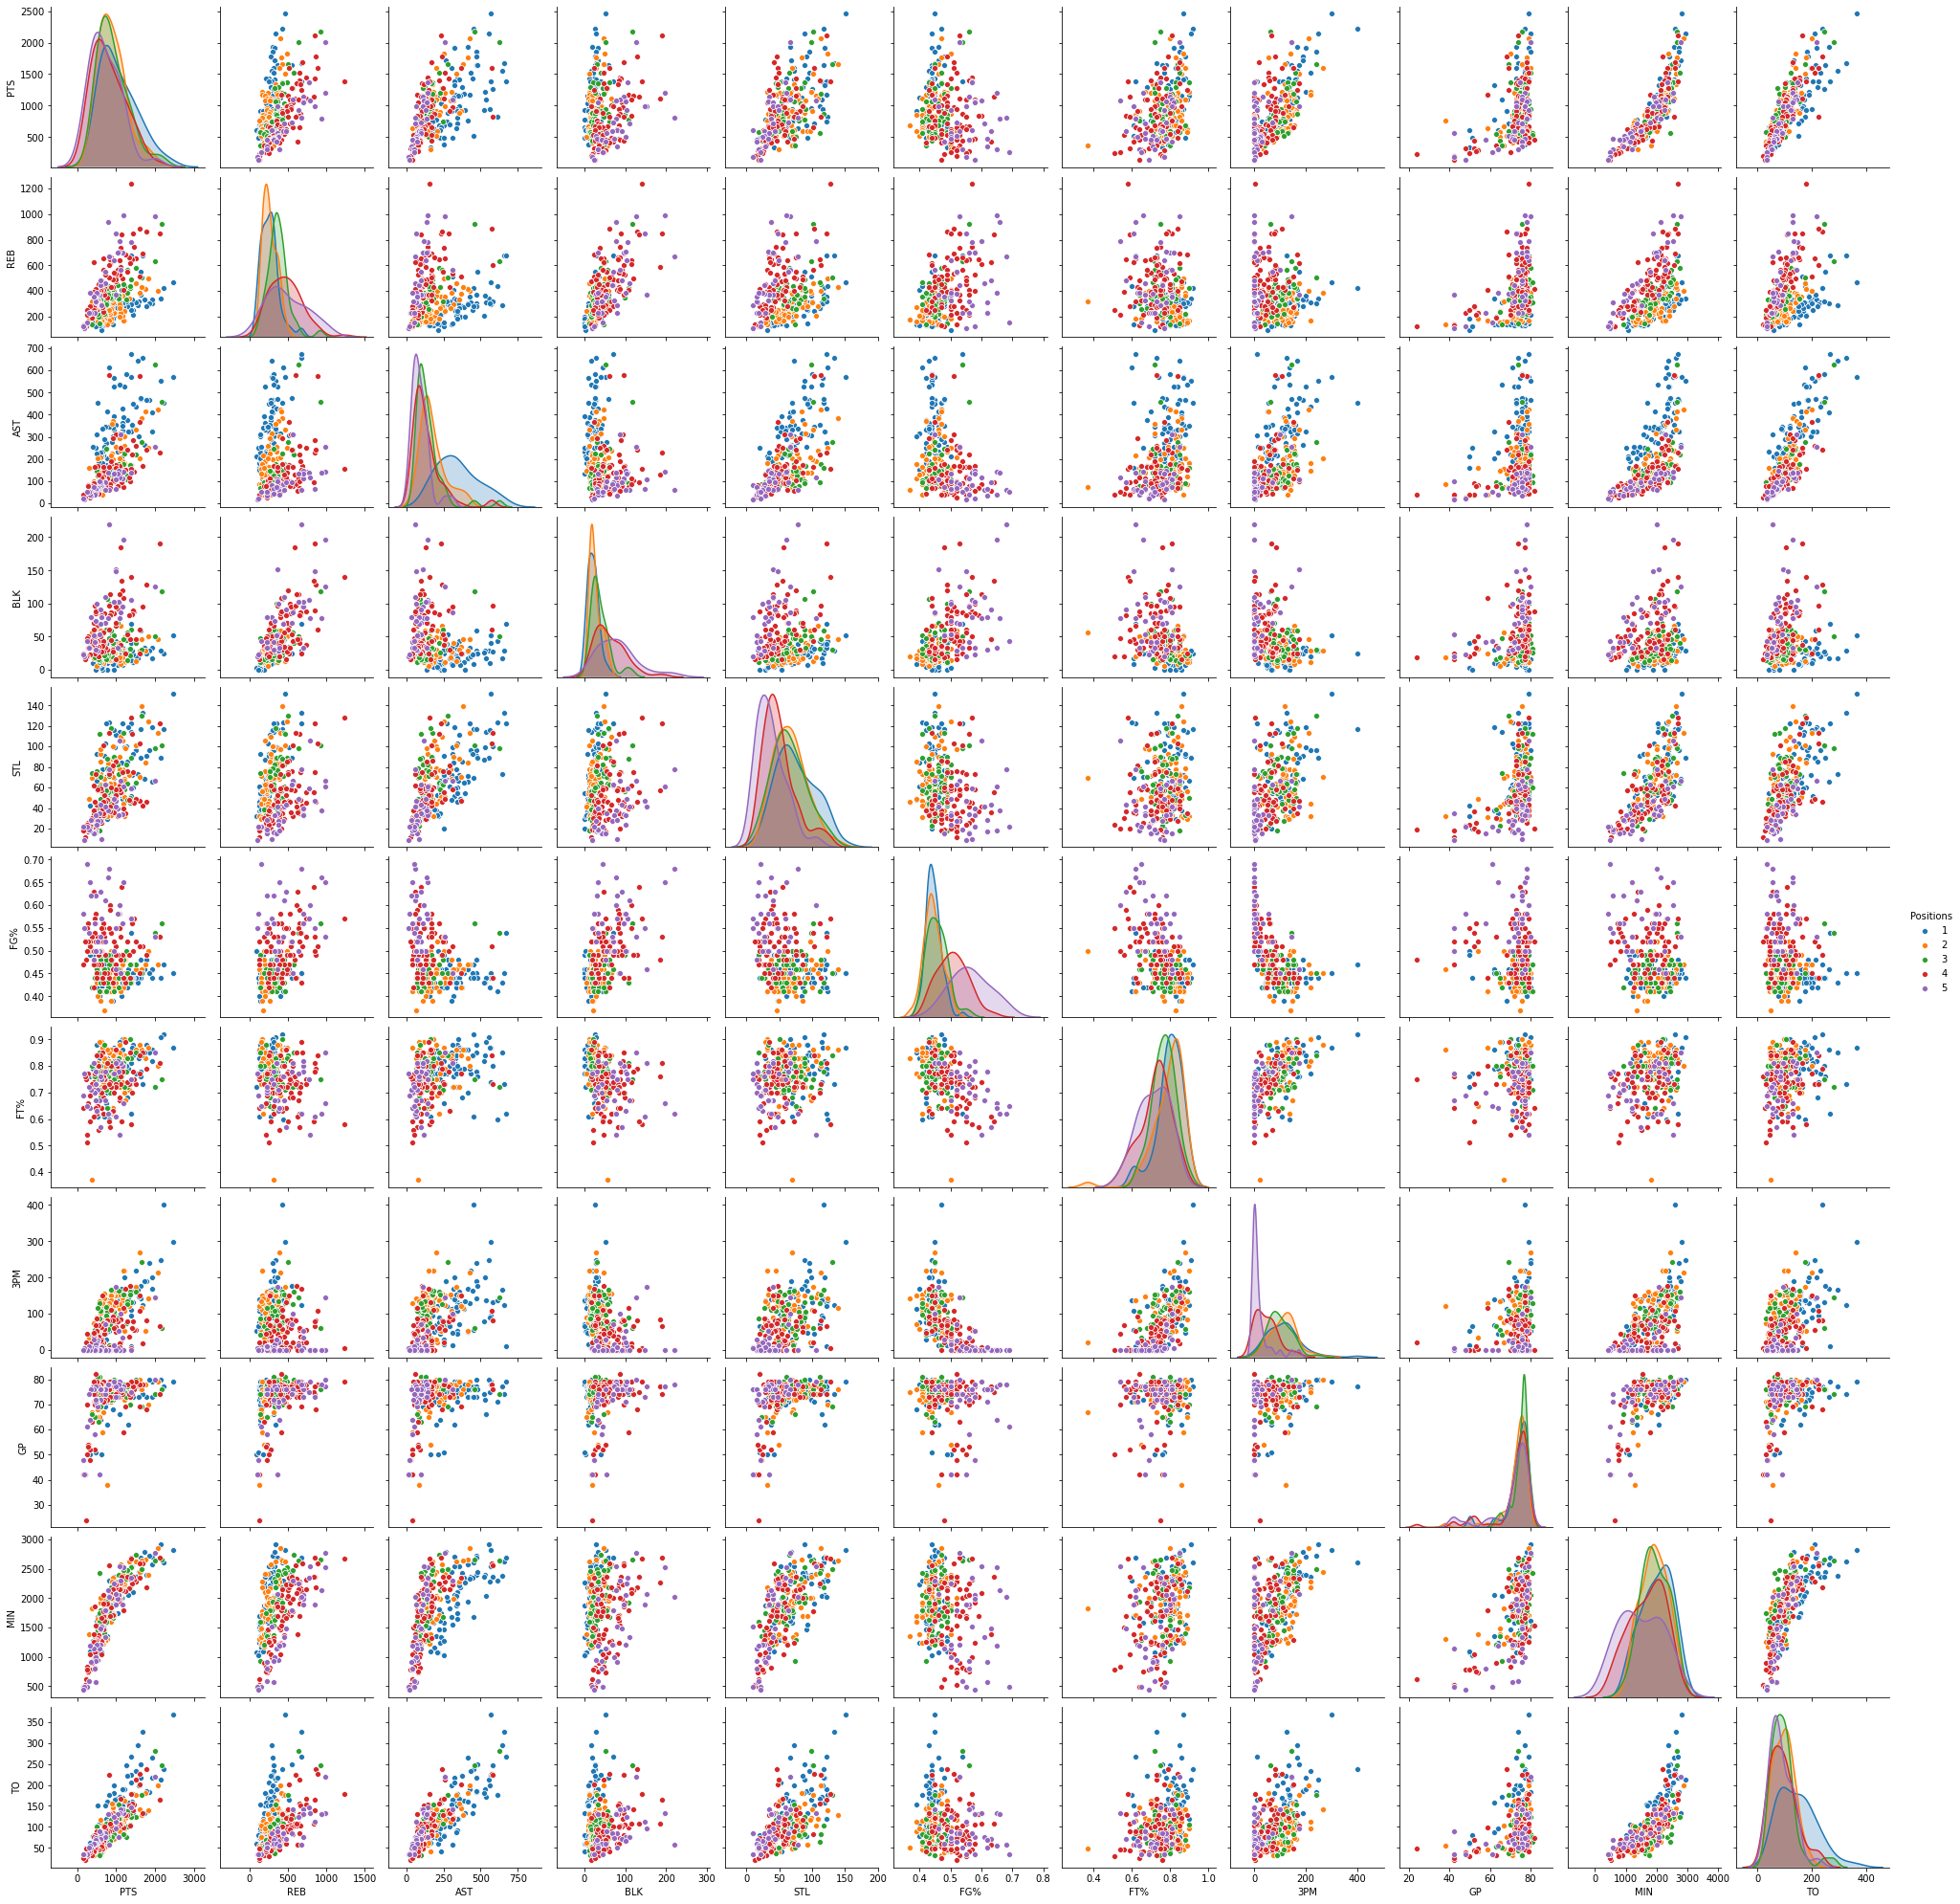

In [17]:
nba_nan_positions.shape
nba_nan_positions_pairplot = sns.pairplot(nba_nan_positions, hue="Positions")

In [0]:
x2 = nba_nan_positions[['Positions', 'PTS', 'REB', 'AST', 'BLK', 'STL', 'FG%', 'FT%', '3PM', 'GP', 'MIN',
       'TO']]
y2 = nba_nan_positions['Positions']

###**Variance ratio 2**

datos originales = (287, 14)
datos numericos sin NaNs = (287, 14)
varianza explicada acumulada =[ 42.58188199  69.30874033  77.60214596  84.36746438  88.15280715
  91.41036518  93.90416706  96.01913693  97.7790563   98.73522796
  99.53959733 100.        ]
Dimensionalidad datos en espacio PCA reducido = (287, 6)


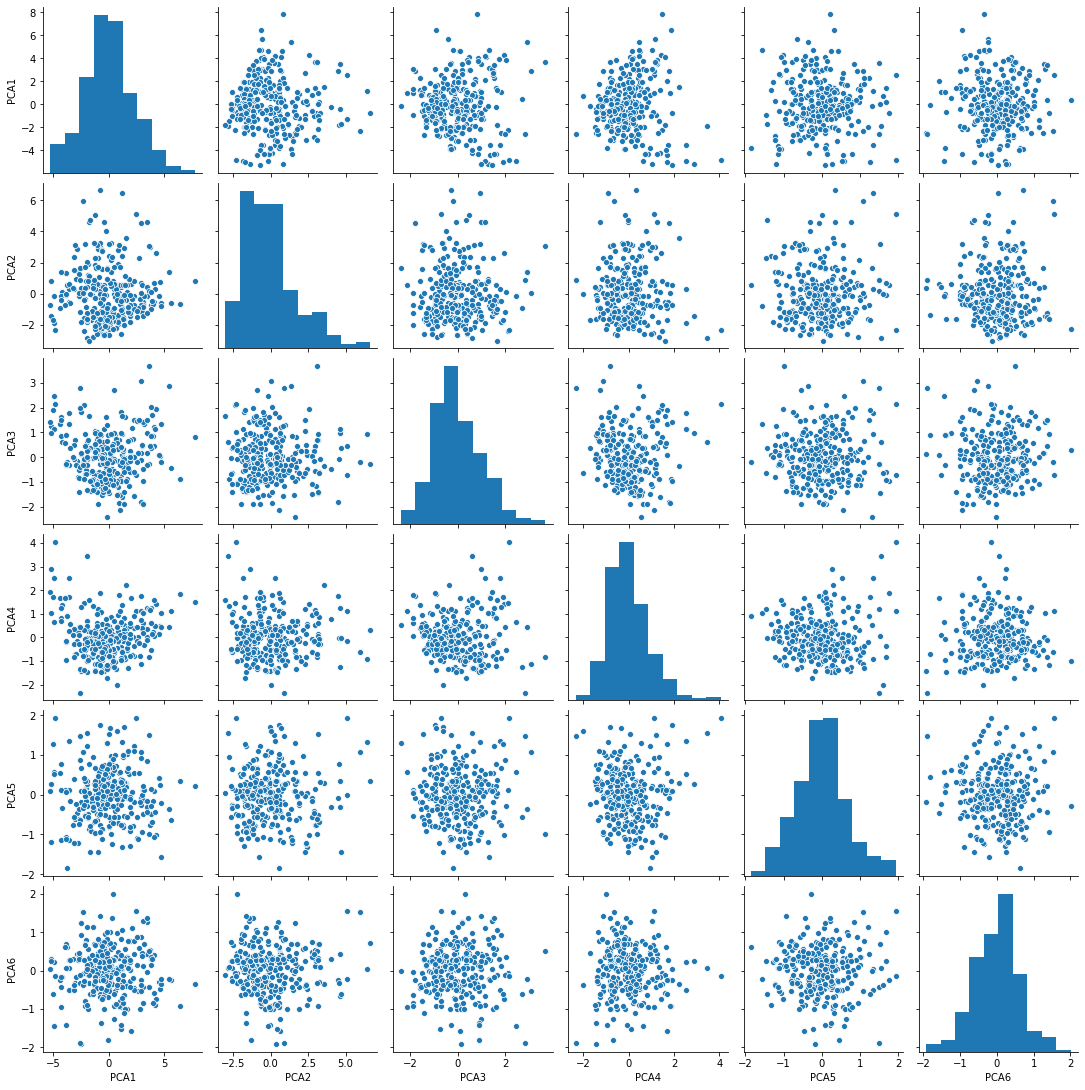

In [88]:
import matplotlib.pyplot as plt

XS2 = StandardScaler().fit_transform(x2)

print('datos originales = {}'.format(nba.shape))
print('datos numericos sin NaNs = {}'.format(nba_nan_positions.shape))

pca2 = decomposition.PCA(n_components=12).fit(XS2)
100*pca2.explained_variance_ratio_.cumsum()
print('varianza explicada acumulada ={}'.format(100*pca2.explained_variance_ratio_.cumsum()))

Xproj2 = pca2.transform(XS2)
XPCA2 = Xproj2[:,0:6]

print('Dimensionalidad datos en espacio PCA reducido = {}'.format(XPCA2.shape))

d2 = pd.DataFrame(XPCA2,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6'])
sns.pairplot(d2)
plt.show()

#Recursive Feature Elimination [RFE]

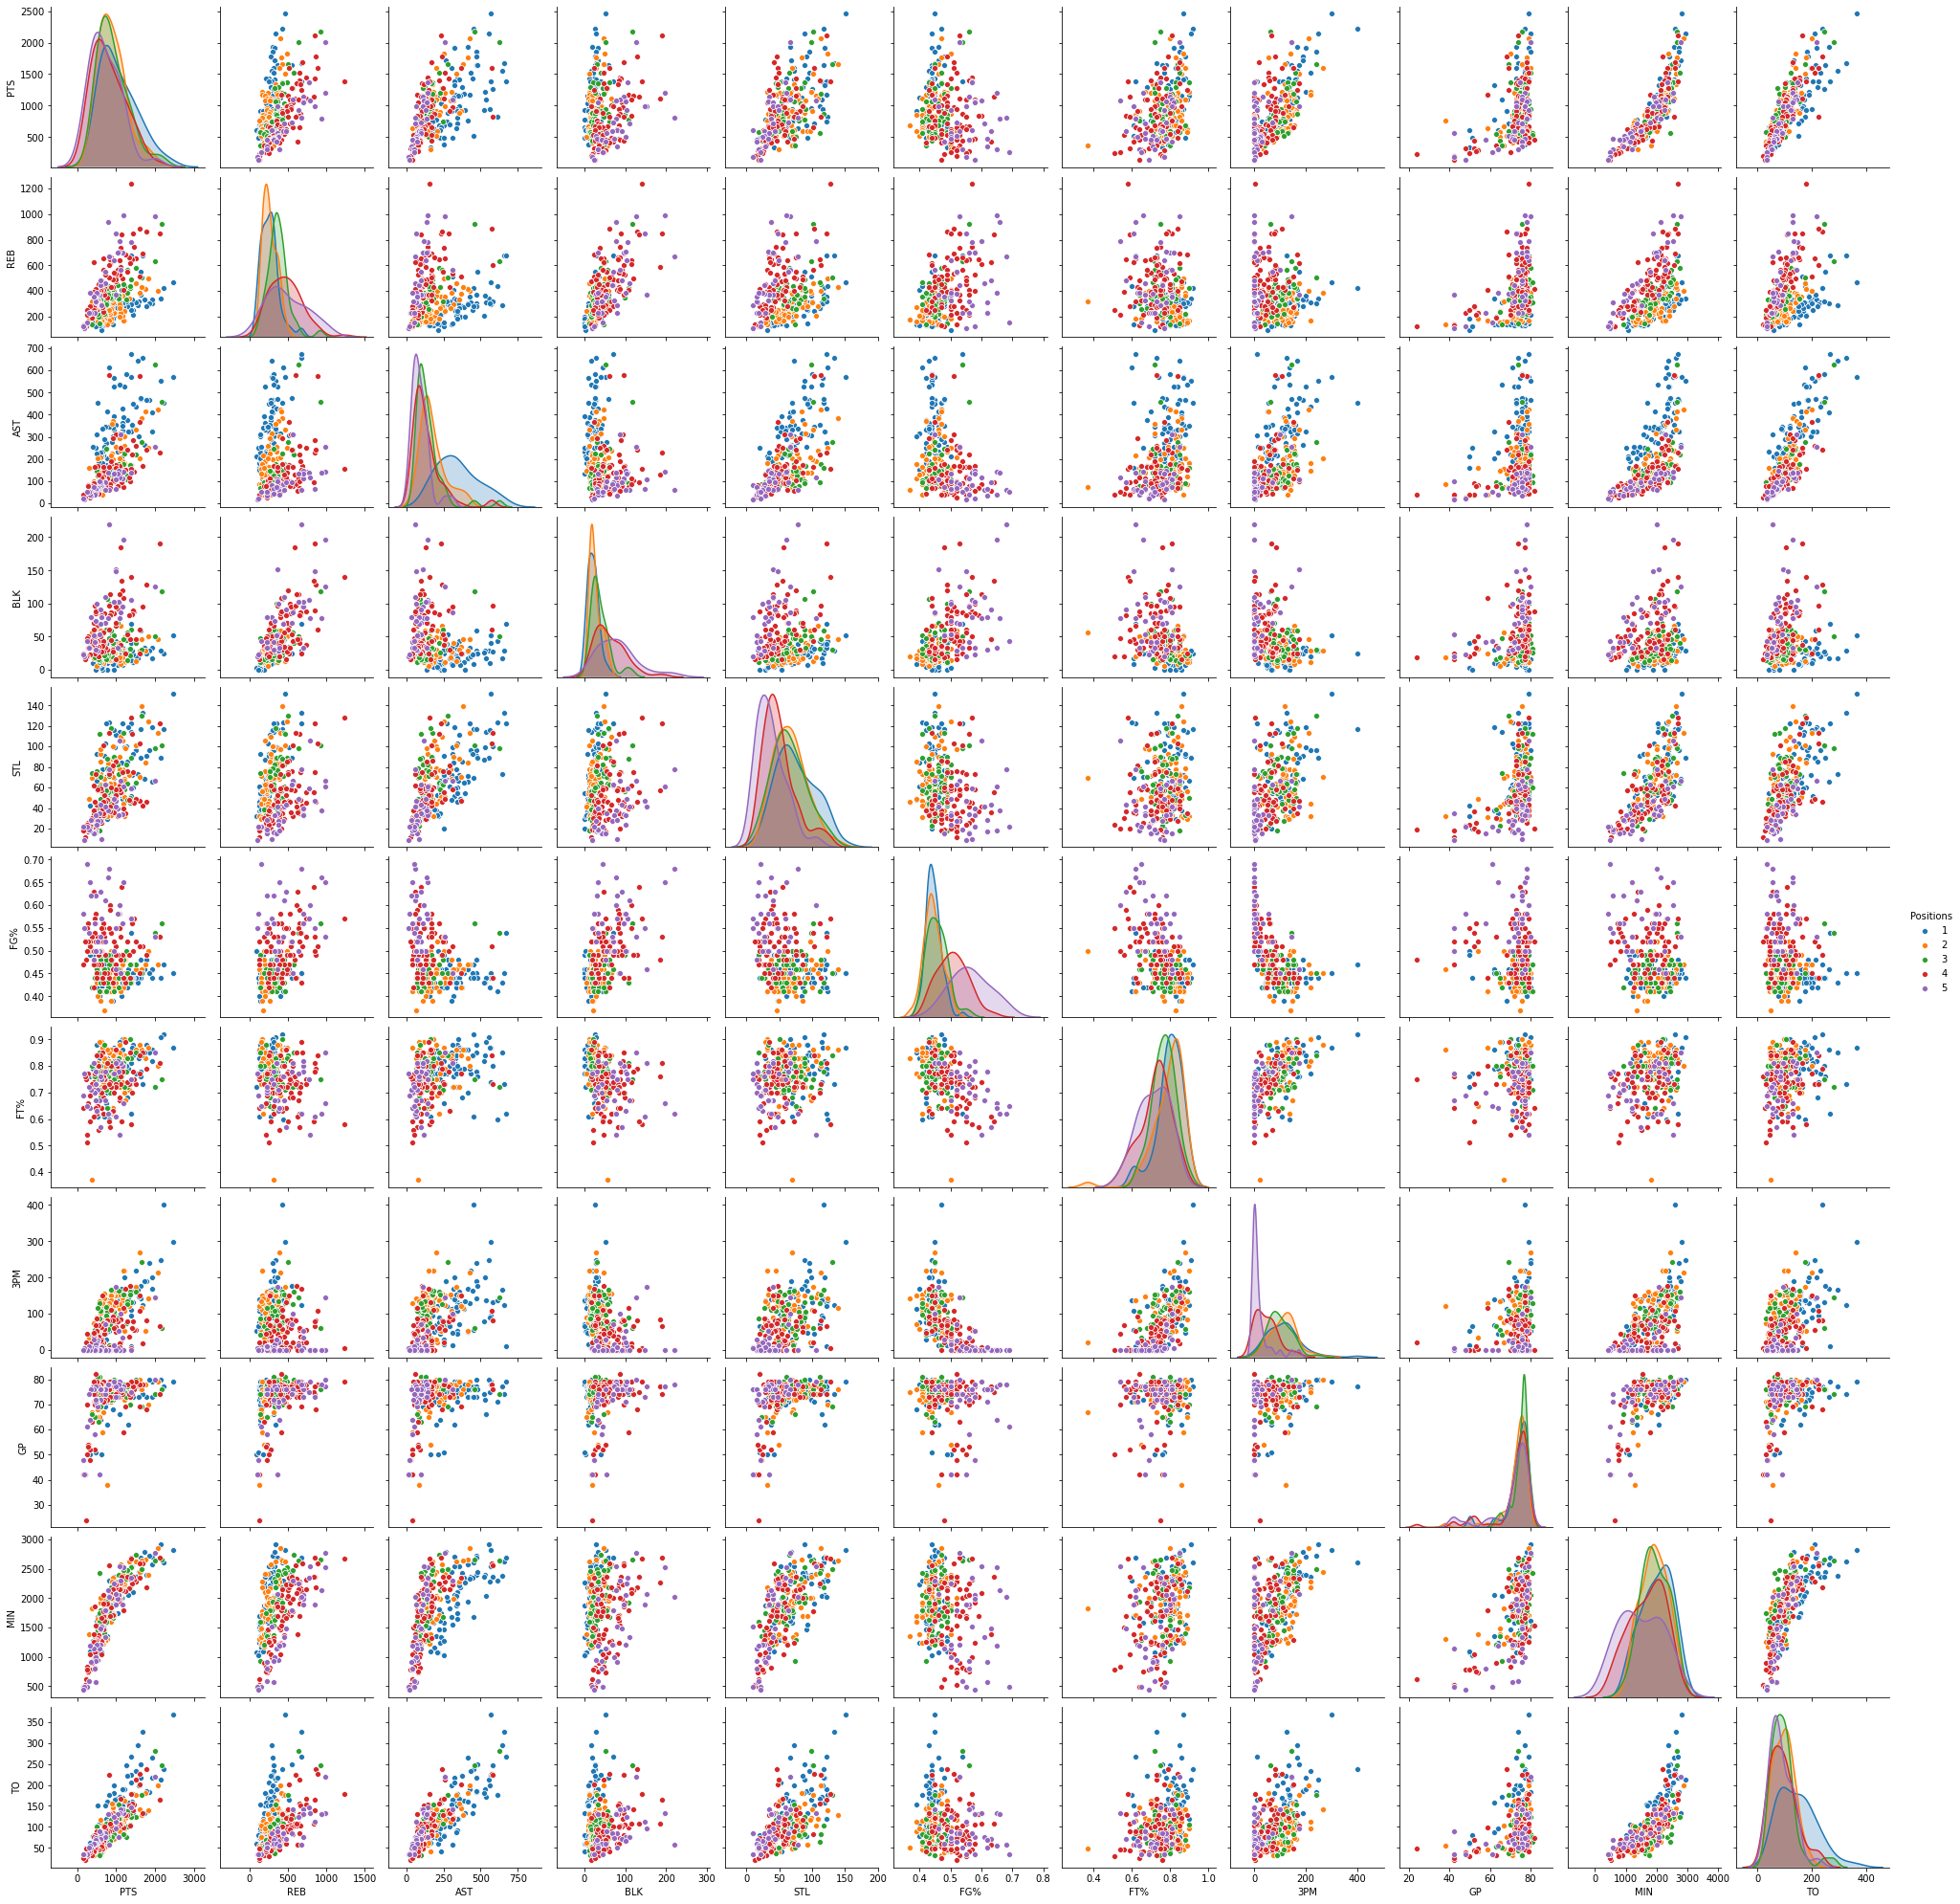

In [53]:
nba_nan_positions.shape
nba_nan_positions_pairplot = sns.pairplot(nba_nan_positions, hue="Positions")

In [0]:
x2_RFE = nba_nan_positions[['PTS', 'REB', 'AST', 'BLK', 'STL', 'FG%', 'FT%', '3PM', 'GP', 'MIN',
       'TO']]
y2_RFE = nba_nan_positions['Positions']

In [58]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets

# Create the RFE object and rank each variable
svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(x2_RFE, y2_RFE)
print('Kept features: {}'.format(rfe.support_))
print('Raking of the features: {}'.format(rfe.ranking_))

Kept features: [False False False False False  True False False False False False]
Raking of the features: [11  7  8  3  4  1  2  9  5 10  6]
